# Homework #4:
## Chapters 1 & 2 from Statistical Regression and Classification by Norman Matloff

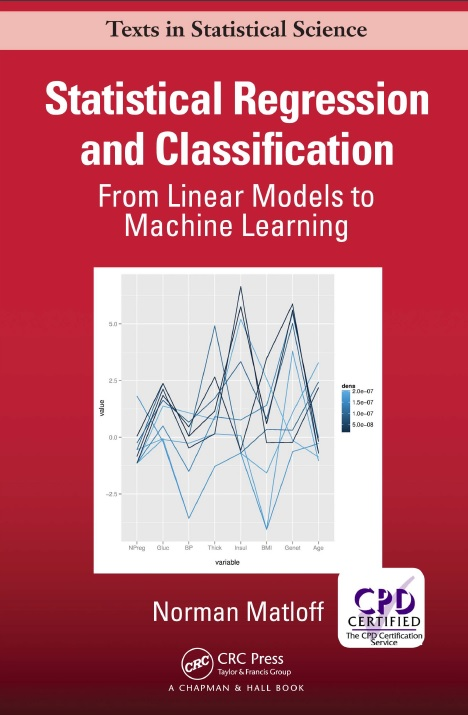

# Chapter 1 - Setting the Stage

<div>
<div class="alert alert-block alert-success">
## Question 1 
<div>
<div class="alert alert-block alert-success">
In Section 1.12.1.2, the reader was reminded that the results of a cross-validation are random, due to the random partitioning into training and test sets. Try doing several runs of the linear and k-NN code in that section,
comparing results.

In [1]:
#install.packages("freqparcoord")
require(freqparcoord)
data(mlb)

Loading required package: freqparcoord
Warning message:
"package 'freqparcoord' was built under R version 3.4.3"Loading required package: parallel
Loading required package: ggplot2
Loading required package: GGally
Warning message:
"package 'GGally' was built under R version 3.4.3"Loading required package: FNN
Warning message:
"package 'FNN' was built under R version 3.4.3"Loading required package: mvtnorm

   

   

   For a quick introduction, type ?freqparcoord, and
   run the examples, making sure to read the comments.
   

   



In [2]:
head(mlb)

Name,Team,Position,Height,Weight,Age,PosCategory
Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder
Brian_Roberts,BAL,Second_Baseman,69,176,29.39,Infielder


In [3]:
xvalpart <- function(data, p) {
  n <- nrow(data)
  ntrain <- round(p*n)
  trainidxs <- sample(1:n, ntrain, replace = FALSE)
  list(train = data[trainidxs,], valid = data[-trainidxs,])
}

In [4]:
xvallm <- function(data, ycol, predvars, p, meanabs = TRUE) {
  tmp <- xvalpart(data, p)
  train <- tmp$train
  valid <- tmp$valid
  #fit model to training data
  trainy <- train[,ycol]
  trainpreds <- train[,predvars]
  # using matrix form in lm() call
  trainpreds <- as.matrix(trainpreds)
  lmout <- lm(trainy ~ trainpreds)
  # apply fitted model to validation data; not that %*% works only on matrices, not data frames
  validpreds <- as.matrix(valid[,predvars])
  predy <- cbind(1, validpreds)%*%coef(lmout)
  realy <- valid[,ycol]
  if(meanabs)
    return (mean(abs(predy - realy)))
  list(predy = predy, realy = realy)
}

In [40]:
#Check with 80-20 split

round(xvallm(mlb,5 ,c(4 ,6) ,0.8),4)
round(xvallm(mlb,5 ,c(4 ,6) ,0.7),4) 
round(xvallm(mlb,5 ,c(4 ,6) ,0.6),4) 
round(xvallm(mlb,5 ,c(4 ,6) ,0.5),4) 

[1] 14.1236

[1] 13.4368

[1] 13.9335

[1] 13.7351

In [6]:
### Checking the same for KNN algorithm 

xvalknn <- function(data, ycol, predvars, k, p, meanabs = TRUE) {
  data <- data[,c(predvars, ycol)]
  ycol <- length(predvars) + 1
  tmp <- xvalpart(data, p)
  train <- tmp$train
  valid <- tmp$valid
  valid <- as.matrix(valid)
  xd <- preprocessx(train[,-ycol], k)
  kout <- knnest(train[,ycol], xd, k)
  predy <- predict(kout, valid[,-ycol], TRUE)
  realy <- valid[,ycol]
  if(meanabs) return (mean(abs(predy - realy)))
  list(predy = predy, realy = realy)
}

In [7]:
#install.packages("regtools")
require(regtools)

Loading required package: regtools
Warning message:
"package 'regtools' was built under R version 3.4.3"Loading required package: dummies
dummies-1.5.6 provided by Decision Patterns

Loading required package: car
Warning message:
"package 'car' was built under R version 3.4.3"

In [8]:
set.seed(9999)
xvalknn(mlb, 5, c(4,6), 25, 0.7)

[1] 14.04643

In [9]:
####similar results to our linear regression
set.seed(9999)
xvalknn(mlb, 5, c(4,6), 17, 0.7)  ##slightly better cross validation results for a different k 

[1] 13.93655

<div>
<div class="alert alert-block alert-success"> 
## Question 2 <div>
<div class="alert alert-block alert-success">
Extend (1.28) to include interaction terms for age and gender, and age^2 and gender. Run the new model, and find the estimated effect of being female, for a 32-year-old person with a Master's degree.

In [10]:
library(freqparcoord)
data(prgeng)

In [11]:
prgeng$age2<-prgeng$age^2
edu<-prgeng$educ
prgeng$ms<-as.integer(edu==14)
prgeng$phd<-as.integer(edu==16)
prgeng$fem<-prgeng$sex-1
tmp<-prgeng[edu>= 13,]
pe<-tmp[,c(1,12,9,13,14,15,8)]
pe<-as.matrix(pe)

In [12]:
reg1<-lm(wageinc~age+age2+wkswrkd+ms+phd+fem,data=prgeng)
summary(reg1)


Call:
lm(formula = wageinc ~ age + age2 + wkswrkd + ms + phd + fem, 
    data = prgeng)

Residuals:
   Min     1Q Median     3Q    Max 
-98563 -20332  -4273  12781 290808 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81136.70    3284.75  -24.70   <2e-16 ***
age           3900.35     168.77   23.11   <2e-16 ***
age2           -40.33       1.95  -20.68   <2e-16 ***
wkswrkd       1196.39      21.89   54.65   <2e-16 ***
ms           15431.07     738.80   20.89   <2e-16 ***
phd          23183.97    1626.70   14.25   <2e-16 ***
fem         -11484.49     705.30  -16.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42650 on 20083 degrees of freedom
Multiple R-squared:  0.2356,	Adjusted R-squared:  0.2354 
F-statistic:  1032 on 6 and 20083 DF,  p-value: < 2.2e-16


In [13]:
prgeng$msfem<-prgeng$ms*prgeng$fem
prgeng$phdfem<-prgeng$phd*prgeng$fem

In [14]:
reg2<-lm(wageinc~age+age2+wkswrkd+ms+phd+fem+msfem+phdfem,data=prgeng)
summary(reg2)


Call:
lm(formula = wageinc ~ age + age2 + wkswrkd + ms + phd + fem + 
    msfem + phdfem, data = prgeng)

Residuals:
    Min      1Q  Median      3Q     Max 
-100361  -20374   -4247   12824  289893 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81216.778   3283.880 -24.732  < 2e-16 ***
age           3894.320    168.735  23.080  < 2e-16 ***
age2           -40.293      1.949 -20.669  < 2e-16 ***
wkswrkd       1195.309     21.889  54.609  < 2e-16 ***
ms           16433.668    846.655  19.410  < 2e-16 ***
phd          25325.315   1759.281  14.395  < 2e-16 ***
fem         -10276.797    804.498 -12.774  < 2e-16 ***
msfem        -4157.253   1728.329  -2.405  0.01617 *  
phdfem      -14061.635   4605.664  -3.053  0.00227 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42640 on 20081 degrees of freedom
Multiple R-squared:  0.2361,	Adjusted R-squared:  0.2358 
F-statistic: 775.9 on 8 and 20081 DF,  p-value: < 

In [15]:
##another way to create interaction terms. confirm same output.

reg3<-lm(wageinc~age+age2+wkswrkd+ms+phd+fem+ms:fem+phd:fem,data=prgeng)
summary(reg3)


Call:
lm(formula = wageinc ~ age + age2 + wkswrkd + ms + phd + fem + 
    ms:fem + phd:fem, data = prgeng)

Residuals:
    Min      1Q  Median      3Q     Max 
-100361  -20374   -4247   12824  289893 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81216.778   3283.880 -24.732  < 2e-16 ***
age           3894.320    168.735  23.080  < 2e-16 ***
age2           -40.293      1.949 -20.669  < 2e-16 ***
wkswrkd       1195.309     21.889  54.609  < 2e-16 ***
ms           16433.668    846.655  19.410  < 2e-16 ***
phd          25325.315   1759.281  14.395  < 2e-16 ***
fem         -10276.797    804.498 -12.774  < 2e-16 ***
ms:fem       -4157.253   1728.329  -2.405  0.01617 *  
phd:fem     -14061.635   4605.664  -3.053  0.00227 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42640 on 20081 degrees of freedom
Multiple R-squared:  0.2361,	Adjusted R-squared:  0.2358 
F-statistic: 775.9 on 8 and 20081 DF,  p-value: 

<div>
<div class="alert alert-block alert-success">
## Question 3
<div>
<div class="alert alert-block alert-success">
Consider the bodyfat data mentioned in Section 1.2. Use lm() to form a prediction equation for density from the other variables (skipping the first three), and comment on whether use of indirect methods in this way seems feasible.

In [16]:
#install.packages("mfp")
require(mfp)

Loading required package: mfp
Warning message:
"package 'mfp' was built under R version 3.4.3"Loading required package: survival


In [17]:
data(bodyfat)

In [18]:
head(bodyfat)

case,brozek,siri,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
1,12.6,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [19]:
reg_bf1 <- lm(density ~ age + weight + height + neck + chest + abdomen + hip + thigh + knee + ankle + biceps + 
              forearm + wrist, data = bodyfat)

summary(reg_bf1)


Call:
lm(formula = density ~ age + weight + height + neck + chest + 
    abdomen + hip + thigh + knee + ankle + biceps + forearm + 
    wrist, data = bodyfat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021527 -0.007717  0.000096  0.006491  0.034114 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.139e+00  4.030e-02  28.248  < 2e-16 ***
age         -1.203e-04  7.515e-05  -1.601  0.11062    
weight       2.395e-04  1.243e-04   1.926  0.05528 .  
height       1.498e-04  2.230e-04   0.672  0.50243    
neck         1.075e-03  5.401e-04   1.991  0.04765 *  
chest        1.232e-04  2.303e-04   0.535  0.59339    
abdomen     -2.277e-03  2.008e-04 -11.335  < 2e-16 ***
hip          5.513e-04  3.390e-04   1.626  0.10521    
thigh       -6.149e-04  3.354e-04  -1.833  0.06799 .  
knee        -4.844e-05  5.622e-04  -0.086  0.93141    
ankle       -6.314e-04  5.145e-04  -1.227  0.22094    
biceps      -5.755e-04  3.976e-04  -1.448  0.14907 

In [21]:

###need to iteratively remove variables with high p-values (alpha = 0.1). Removed height, chest, knee, ankle, biceps

reg_bf2 <- lm(density ~ age + weight + neck + abdomen + hip + thigh + forearm + wrist, data = bodyfat)

summary(reg_bf2)

### 72% of the variation in bodyfat percentage is explained by 
### variation in age, weight, neck, abdomen, hip, thigh, forearm and wrist measurements.


Call:
lm(formula = density ~ age + weight + neck + abdomen + hip + 
    thigh + forearm + wrist, data = bodyfat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022111 -0.007011  0.000046  0.006765  0.037856 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.147e+00  2.732e-02  41.986  < 2e-16 ***
age         -1.276e-04  7.178e-05  -1.778  0.07663 .  
weight       2.326e-04  9.307e-05   2.499  0.01310 *  
neck         1.091e-03  5.239e-04   2.084  0.03825 *  
abdomen     -2.205e-03  1.678e-04 -13.143  < 2e-16 ***
hip          5.270e-04  3.229e-04   1.632  0.10403    
thigh       -8.178e-04  3.010e-04  -2.717  0.00706 ** 
forearm     -1.193e-03  4.345e-04  -2.745  0.00650 ** 
wrist        3.586e-03  1.188e-03   3.019  0.00281 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009986 on 243 degrees of freedom
Multiple R-squared:  0.7334,	Adjusted R-squared:  0.7247 
F-statistic: 83.57 on

In [22]:
outlierTest(reg_bf2) # Bonferonni p-value for most extreme obs. 

   rstudent unadjusted p-value Bonferonni p
96 4.003309         8.3107e-05     0.020943

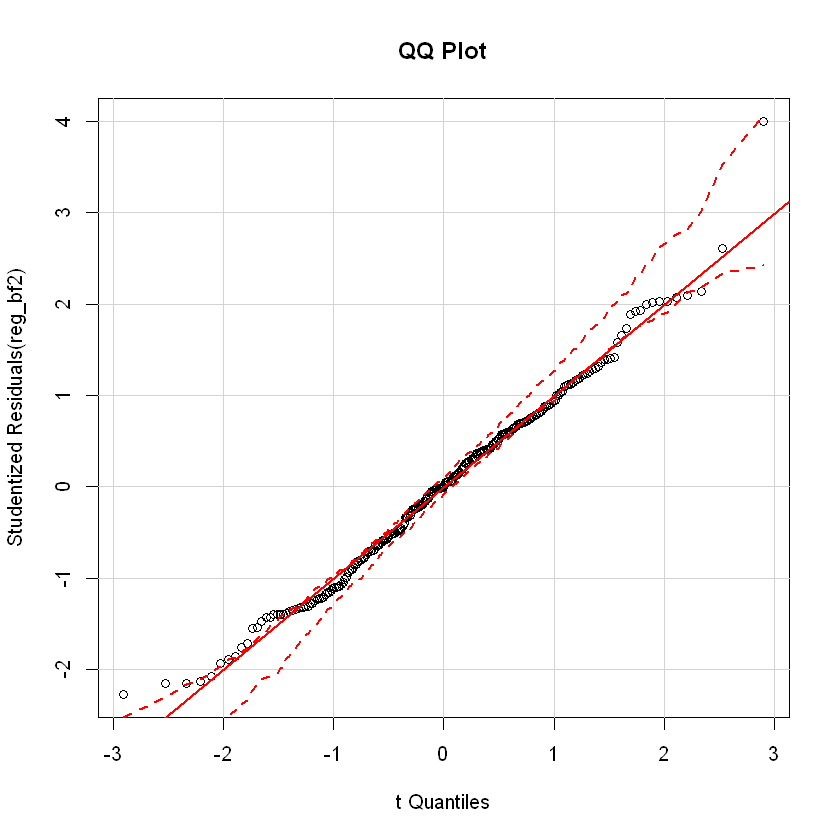

In [23]:
qqPlot(reg_bf2, main="QQ Plot") #qq plot for studentized resid.  Not too bad, no serious indication of non-normality.

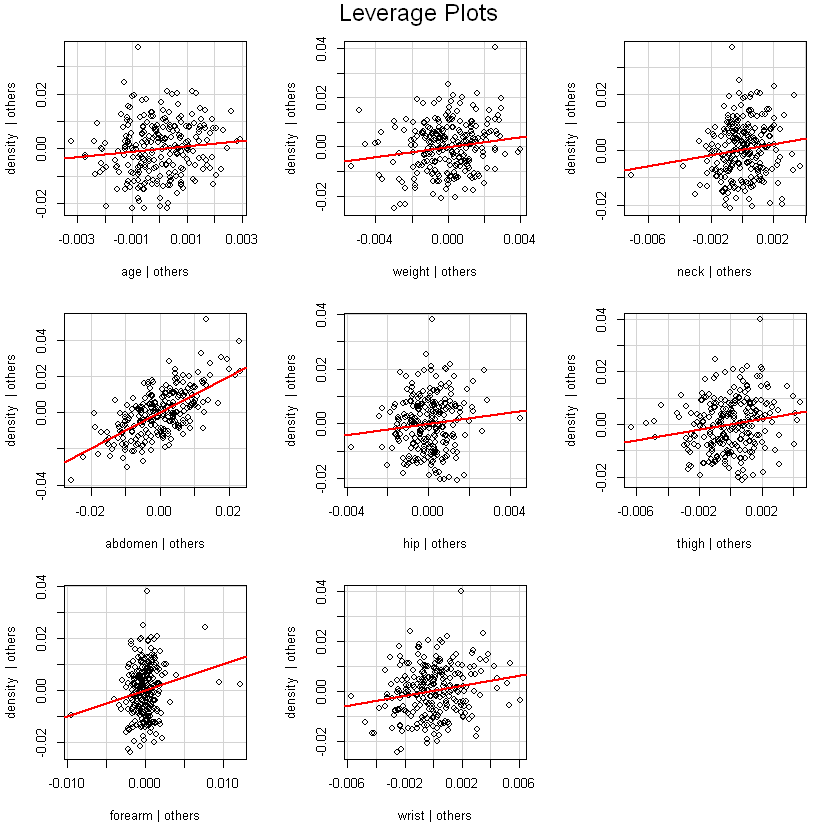

In [24]:
leveragePlots(reg_bf2) ##shows the unique effect of each term in the model.

In [25]:
### We can actually drop everything except for weight, abdomen, and thigh and our model's predictive power stays almost the same.

reg_bf3<-lm(density ~ weight + abdomen + thigh, data = bodyfat)
summary(reg_bf3)

###  In fact, 71% of variation in density is explained by these 3 variables.



Call:
lm(formula = density ~ weight + abdomen + thigh, data = bodyfat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021966 -0.007520 -0.000478  0.007319  0.039366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.222e+00  1.005e-02 121.672  < 2e-16 ***
weight       4.547e-04  6.255e-05   7.269 4.71e-12 ***
abdomen     -2.272e-03  1.315e-04 -17.278  < 2e-16 ***
thigh       -6.379e-04  2.508e-04  -2.544   0.0116 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01033 on 248 degrees of freedom
Multiple R-squared:  0.7089,	Adjusted R-squared:  0.7054 
F-statistic: 201.3 on 3 and 248 DF,  p-value: < 2.2e-16


<div>
<div class="alert alert-block alert-success">
## Question 4
In Section 1.19.5.2, we gave this intuitive explanation: In other words, the national mean height is a weighted average of the state means, with the weight for each state being its proportion of the national population. Replace state by gender in the following.
### 4a. 
Write English prose that relates the overall mean height of people and the gender-specific mean heights.

#### The overall mean height is the weighted average of the gender mean height, with the weight for each gender being its proportion of the total population

<div>
<div class="alert alert-block alert-success">
### 4b. 
Write English prose that relates the overall proportion of people taller than 70 inches to the gender-specic proportions.

#### The overall proportion of people taller than 70 inches is the weighted average of the proportion of people over 70 inches in each gender, with weight for each gender being its proportion of the total population taller than 70 inches.

<br> <br> 

# Chapter 2

<div>
<div class="alert alert-block alert-success">
## Question 1

In [26]:
library(freqparcoord)
data(prgeng)

In [27]:
prgeng$age2 <- prgeng$age^2
edu <- prgeng$educ
prgeng$ms <- as.integer(edu == 14)
prgeng$phd <- as.integer(edu == 16)
prgeng$fem <- prgeng$sex - 1
tmp <- prgeng[edu >= 13,]
pe <- tmp[ ,c(1 ,12 ,9 ,13 ,14 ,15 ,8)]
pe <- as.matrix(pe)

In [28]:
reg<-lm(wageinc ~ age + age2 + wkswrkd + ms + phd + fem, data = prgeng)
reg


Call:
lm(formula = wageinc ~ age + age2 + wkswrkd + ms + phd + fem, 
    data = prgeng)

Coefficients:
(Intercept)          age         age2      wkswrkd           ms          phd  
  -81136.70      3900.35       -40.33      1196.39     15431.07     23183.97  
        fem  
  -11484.49  


### 1a.

In [29]:
fem_coeff <- summary(reg)$coefficients[7, 1]
fem_se <- summary(reg)$coefficients[7, 2]

lcl_fem <- fem_coeff - 1.96*fem_se
ucl_fem <- fem_coeff + 1.96*fem_se

lcl_fem  ## -12,867
ucl_fem  ## -10,102

[1] -12866.88

[1] -10102.1

### 1b.

In [31]:
prgeng$msfem <- prgeng$ms * prgeng$fem
prgeng$phdfem <- prgeng$phd * prgeng$fem
reg2 <- lm(wageinc ~ age + age2 + wkswrkd + ms + phd + fem + msfem + phdfem, data = prgeng )

summary(reg2)


Call:
lm(formula = wageinc ~ age + age2 + wkswrkd + ms + phd + fem + 
    msfem + phdfem, data = prgeng)

Residuals:
    Min      1Q  Median      3Q     Max 
-100361  -20374   -4247   12824  289893 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81216.778   3283.880 -24.732  < 2e-16 ***
age           3894.320    168.735  23.080  < 2e-16 ***
age2           -40.293      1.949 -20.669  < 2e-16 ***
wkswrkd       1195.309     21.889  54.609  < 2e-16 ***
ms           16433.668    846.655  19.410  < 2e-16 ***
phd          25325.315   1759.281  14.395  < 2e-16 ***
fem         -10276.797    804.498 -12.774  < 2e-16 ***
msfem        -4157.253   1728.329  -2.405  0.01617 *  
phdfem      -14061.635   4605.664  -3.053  0.00227 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42640 on 20081 degrees of freedom
Multiple R-squared:  0.2361,	Adjusted R-squared:  0.2358 
F-statistic: 775.9 on 8 and 20081 DF,  p-value: < 

In [32]:
fem_coeff2<-summary(reg2)$coefficients[7, 1]
fem_se2<-summary(reg2)$coefficients[7, 2]

msfem_coeff<-summary(reg2)$coefficients[8, 1]
msfem_se<-summary(reg2)$coefficients[8, 2]


lcl_msfem <- (fem_coeff2 - 1.96*fem_se2) + (msfem_coeff - 1.96*msfem_se)
ucl_msfem <- (fem_coeff2 + 1.96*fem_se2) + (msfem_coeff + 1.96*msfem_se)

lcl_msfem ## -19,398
ucl_msfem  ## -9,469

[1] -19398.39

[1] -9469.709

## Question 2

In [34]:
setwd("C:/Users/sgus1/Documents/UC Davis MSBA 17-18/Winter 17_18/452_Machine Learning/Homework 4")

In [35]:
shar <- read.csv("day.csv", sep = ",")
shar$temp2 <- shar$temp^2

In [36]:
head(shar)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp2
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985,0.11845092
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801,0.13211626
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349,0.03855882
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562,0.04000000
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600,0.05150948
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,0.04175811


In [37]:
reg_shar <- lm(registered ~ temp + temp2 + season + workingday + windspeed + yr, data = shar)
summary(reg_shar)


Call:
lm(formula = registered ~ temp + temp2 + season + workingday + 
    windspeed + yr, data = shar)

Residuals:
    Min      1Q  Median      3Q     Max 
-4965.2  -317.0   102.6   442.2  1779.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1456.60     208.69  -6.980 6.69e-12 ***
temp        10497.95     894.99  11.730  < 2e-16 ***
temp2       -7141.71     886.59  -8.055 3.26e-15 ***
season        308.59      26.93  11.458  < 2e-16 ***
workingday    919.38      57.89  15.883  < 2e-16 ***
windspeed   -1971.26     359.44  -5.484 5.74e-08 ***
yr           1757.75      53.97  32.570  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 726 on 724 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7835 
F-statistic: 441.2 on 6 and 724 DF,  p-value: < 2.2e-16
